<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/ANN_For__Regression_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression problem mean we are trying to predict a perticular value like cost a host in perticular area,income of a employee etc.

In  this problem, we will use "Graduate Admission dataset" . There are 7 columns in this dataset.
1- GRE Scores ( out of 340 )

2 - TOEFL Scores ( out of 120 )

3 - University Rating ( out of 5 )

4 - Statement of Purpose and Letter of
    Recommendation Strength ( out of 5 )

5 - Undergraduate GPA ( out of 10 )

6 - Research Experience ( either 0 or 1 )

7 - Chance of Admit ( ranging from 0 to 1 )

This 7th column of chance of admit is our output column which ranges from 0 to 1. As the output column is value ranging from 0 to 1 it is a regression problem.

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
data = pd.read_csv('/content/Admission_Predict.csv')

In [241]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [242]:
data.info()
#There is no missing value in any of the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [243]:
data.shape

(400, 9)

In [244]:
data.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [245]:
#We dont need serial no column as it is not
#affecting the decision making of output
data=data.drop('Serial No.',axis=1)

In [246]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


So here what we will do is, we will consider first 7 columns as input to the model and last column i.e. Chance of Admit will be our output column.

**Common Wisdom** - When you are training the Neural Network Model,it is said that you should scale the input on same value. If the input feature values are not on same scale, it will take more time to train the neural model it is very difficult for our weight values to converge.

In [247]:
#Storing input columns in x
#Storing output column in y
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [248]:
x.head() #These are input features

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [249]:
y.head() #This is output feature

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [250]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [251]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [252]:
#As we already know the min and max value of each column.
#We will use min-max scaling to keep all input feature values on same range.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  #Creating the object of MinMaxScaler

In [253]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [254]:
x_train_scaled
 #This is numpy array having scaled x_train in similar values

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

**Building Artificial Neural Network-**

In [255]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [256]:
model = Sequential()
#Creating an object of model having Sequential class

In [257]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176 (704.00 B)

 Trainable params: 176 (704.00 B)

 Non-trainable params: 0 (0.00 B)

In [258]:
#COmpiling the model
model.compile(loss='mean_squared_error',optimizer='Adam')

In [259]:
history=model.fit(x_train_scaled,y_train,epochs=300,validation_split=0.2)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.1380 - val_loss: 0.0803
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0668 - val_loss: 0.0440
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0409 - val_loss: 0.0415
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0393 - val_loss: 0.0422
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0352 - val_loss: 0.0361
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0334 - val_loss: 0.0322
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0286 - val_loss: 0.0300
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0246 - val_loss: 0.0280
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0238 - val_loss: 0.0264
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0230 - val_loss: 0.0247
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0215 - val_loss: 0.0229
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0178 - val_loss: 0

In [260]:
#Now making the prediction
y_pred=model.predict(x_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [261]:
from sklearn.metrics import r2_score
#r2_score means how well a regression model fits the data.
#if r2_score is 100% then  perfect model
#if r2_score is 0% then worst model

In [262]:
r2_score(y_test,y_pred)

0.807028609807033

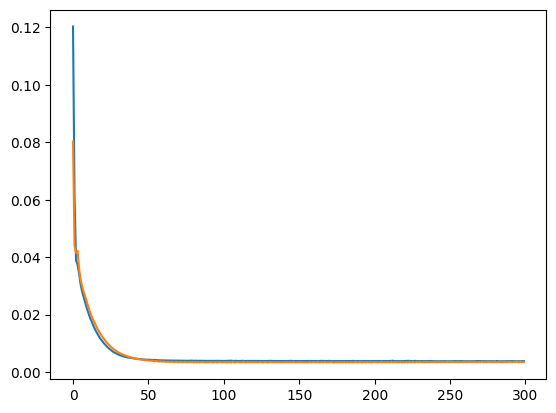

In [264]:
#Now we will draw the graphs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [265]:
y_pred

array([[0.74088234],
       [0.6671737 ],
       [0.795445  ],
       [0.77538615],
       [0.8562915 ],
       [0.63424283],
       [0.63087255],
       [0.53040713],
       [0.48237473],
       [0.9284126 ],
       [0.80968314],
       [0.94052994],
       [0.9022169 ],
       [0.6416969 ],
       [0.71305394],
       [0.6728868 ],
       [0.8167709 ],
       [0.8974524 ],
       [0.50759786],
       [0.68387014],
       [0.64692485],
       [0.7862143 ],
       [0.8342485 ],
       [0.9047516 ],
       [0.66320807],
       [0.5106618 ],
       [0.7344441 ],
       [0.70422864],
       [0.9115832 ],
       [0.6439838 ],
       [0.94371307],
       [0.6536727 ],
       [0.7920549 ],
       [0.78509957],
       [0.69407696],
       [0.6340883 ],
       [0.43777853],
       [0.6368136 ],
       [0.9055709 ],
       [0.7426304 ],
       [0.8705121 ],
       [0.6747422 ],
       [0.88099796],
       [0.63440835],
       [0.97401214],
       [0.7182321 ],
       [0.7189327 ],
       [0.823

**Creating Interactive System:**


In [266]:
def predict_admission():
    print("\nEnter the following details for admission prediction:")

    GRE = float(input("GRE Score (out of 340): "))
    TOEFL = float(input("TOEFL Score (out of 120): "))
    Univ_Rating = float(input("University Rating (out of 5): "))
    SOP = float(input("Statement of Purpose (out of 5): "))
    LOR = float(input("Letter of Recommendation Strength (out of 5): "))
    CGPA = float(input("Undergraduate GPA (out of 10): "))
    Research = int(input("Research Experience (0 or 1): "))

    # Convert input data into a NumPy array
    input_data = np.array([[GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA, Research]])

    # Normalize the input using the same MinMaxScaler used during training
    input_data_scaled = scaler.transform(input_data)

    # Make a prediction
    prediction = model.predict(input_data_scaled)

    print("\n🔍 Predicted Chance of Admission: {:.2f}%".format(prediction[0][0] * 100))

# Call the function
predict_admission()


Enter the following details for admission prediction:
GRE Score (out of 340): 325
TOEFL Score (out of 120): 106
University Rating (out of 5): 3
Statement of Purpose (out of 5): 3.5
Letter of Recommendation Strength (out of 5): 4
Undergraduate GPA (out of 10): 8.4
Research Experience (0 or 1): 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step

🔍 Predicted Chance of Admission: 71.51%
